## CS:GO Skin Win probabilities

YouTuber [3kliksphilip](https://www.youtube.com/channel/UCmu9PVIZBk-ZCi-Sk2F2utA) recently posted a video titled ["Case Unboxing Millionaire #2"](https://www.youtube.com/watch?v=a-FdnfZhguw), wherein he showed a single run simulation of him 'unboxing' cases for the first-person-shooter computer game Counter Strike: Global Offensive. These cases are digital items which, when opened, unlock a decorative weapon 'skin'. These skins can be used by players in the game to show off to their friends. Such skins have deveoped quite a market for themselves and can be bought and sold for hundreds or even thousands of dollars through various online marketplaces.

3kliksphilip uploaded another video titled [Case Unboxing Millionaire #3](https://www.youtube.com/watch?v=AObvZDfUa3k), where he did a simulated run of unlocking the "eSports 2013 Case" until he openned a knife. My previous analysis showed the expected value to be a loss of \\$5720.96. This analysis calculates the information for the "Winter Offensive Weapon Case", as 3kliksphilip has challenged viewers to submit a guess for this case in his latest video.

It costs \\$5.20 to open, and can contain skins worth between a few dollars to around \\$300. 3kliksphilip challenged his viewers to estimate his profit or loss from opening this case up until he unlocked a knife skin, the rarest skin to obatin. I have calculated this expected value to be a loss of \\$830.06.

In [1]:
import json
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use("bmh")
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams["font.size"] = "20"

In [3]:
# 'prices_v4.json' downloaded (from https://csgotrader.app/prices/)
with open('prices_v4.json') as f:
  data = json.load(f)

In [4]:
# case details (from https://csgostash.com/case/7/Winter-Offensive-Weapon-Case)
case_name = "Winter-Offensive-Weapon-Case"
case_items = {'Blue': ['M249 | Magma', 'Five-SeveN | Kami', 'PP-Bizon | Cobalt Halftone',
                      'Galil AR | Sandstorm'],
             'Purple': ['Nova | Rising Skull', 'FAMAS | Pulse', 'Dual Berettas | Marina',
                       'MP9 | Rose Iron'],
             'Pink': ['P250 | Mehndi', 'P250 | Mehndi', 'AWP | Redline'],
             'Red': ['Sawed-Off | The Kraken', 'M4A4 | Asiimov'],
             'Yellow': ['Knife']} # can't be bothered putting in all 65 knives, 
                                  # so let's just assume $300 avg value for all knives for our purposes

In [5]:
# implied by float values (from https://totalcsgo.com/skin-conditions)
skin_condition_probs = {'Factory New': 0.07,
                        'Minimal Wear': 0.15,
                        'Field Tested': 0.38,
                        'Well Worn': 0.45,
                        'Battle Scared': 1}
skin_condition_cdf = [0.07, 0.15, 0.38, 0.45, 1]
skin_condition_pdf = [0.07, 0.08, 0.23, 0.07, 0.55]

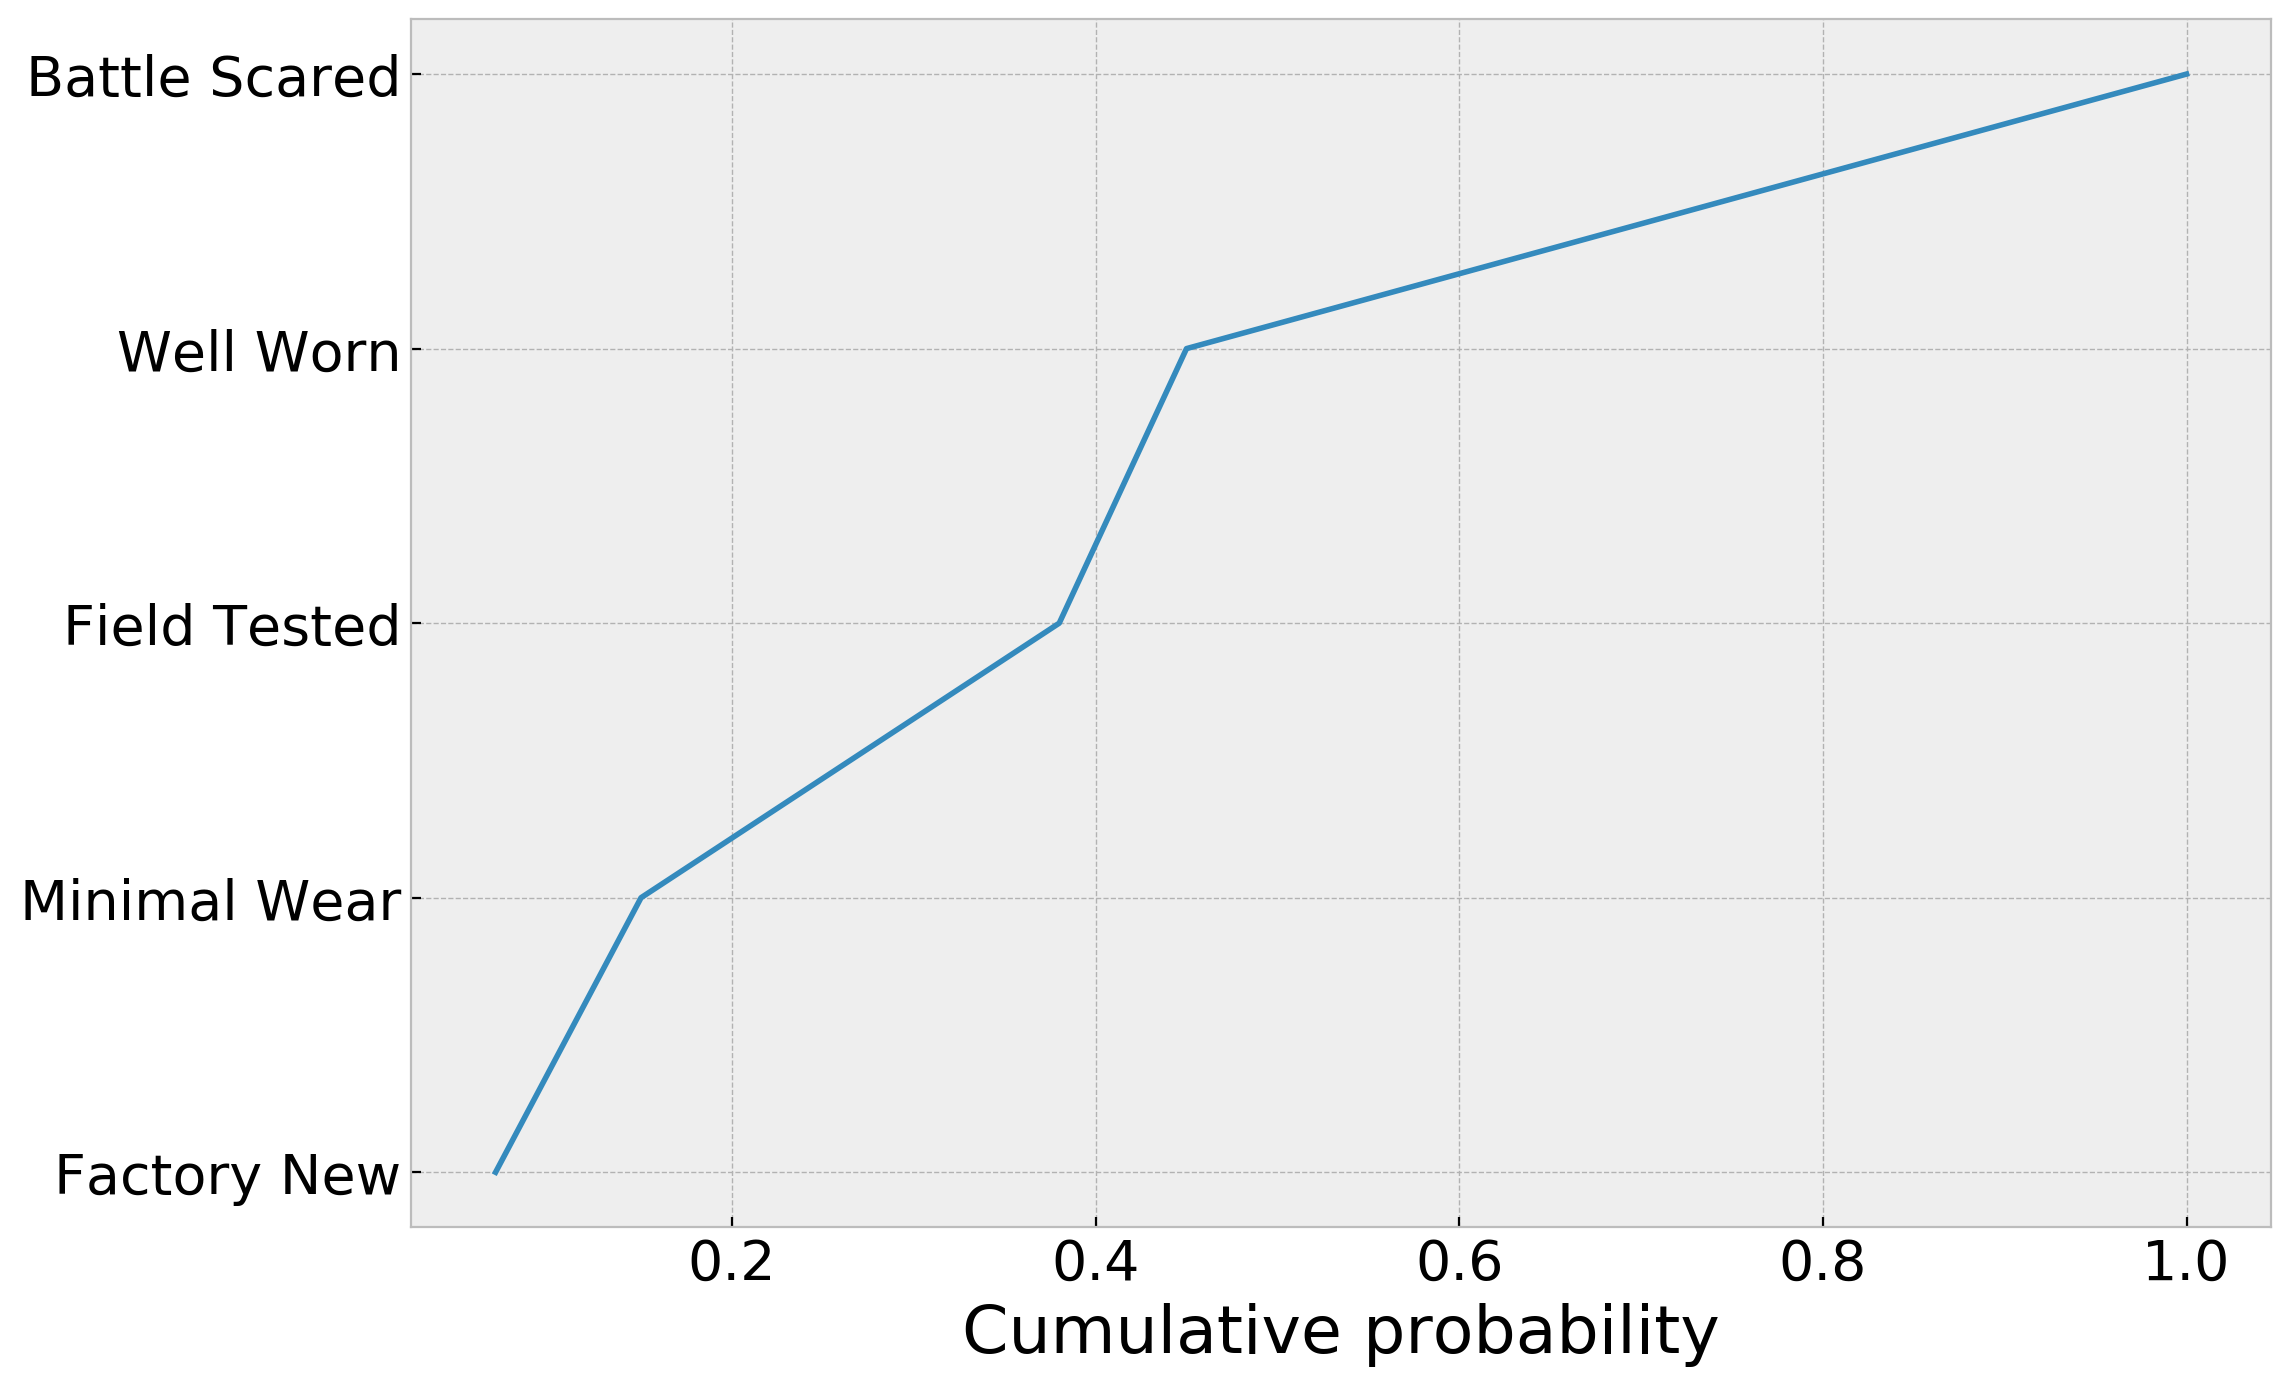

In [6]:
plt.plot(list(skin_condition_probs.values()), list(skin_condition_probs.keys()))
plt.xlabel('Cumulative probability')
plt.show()

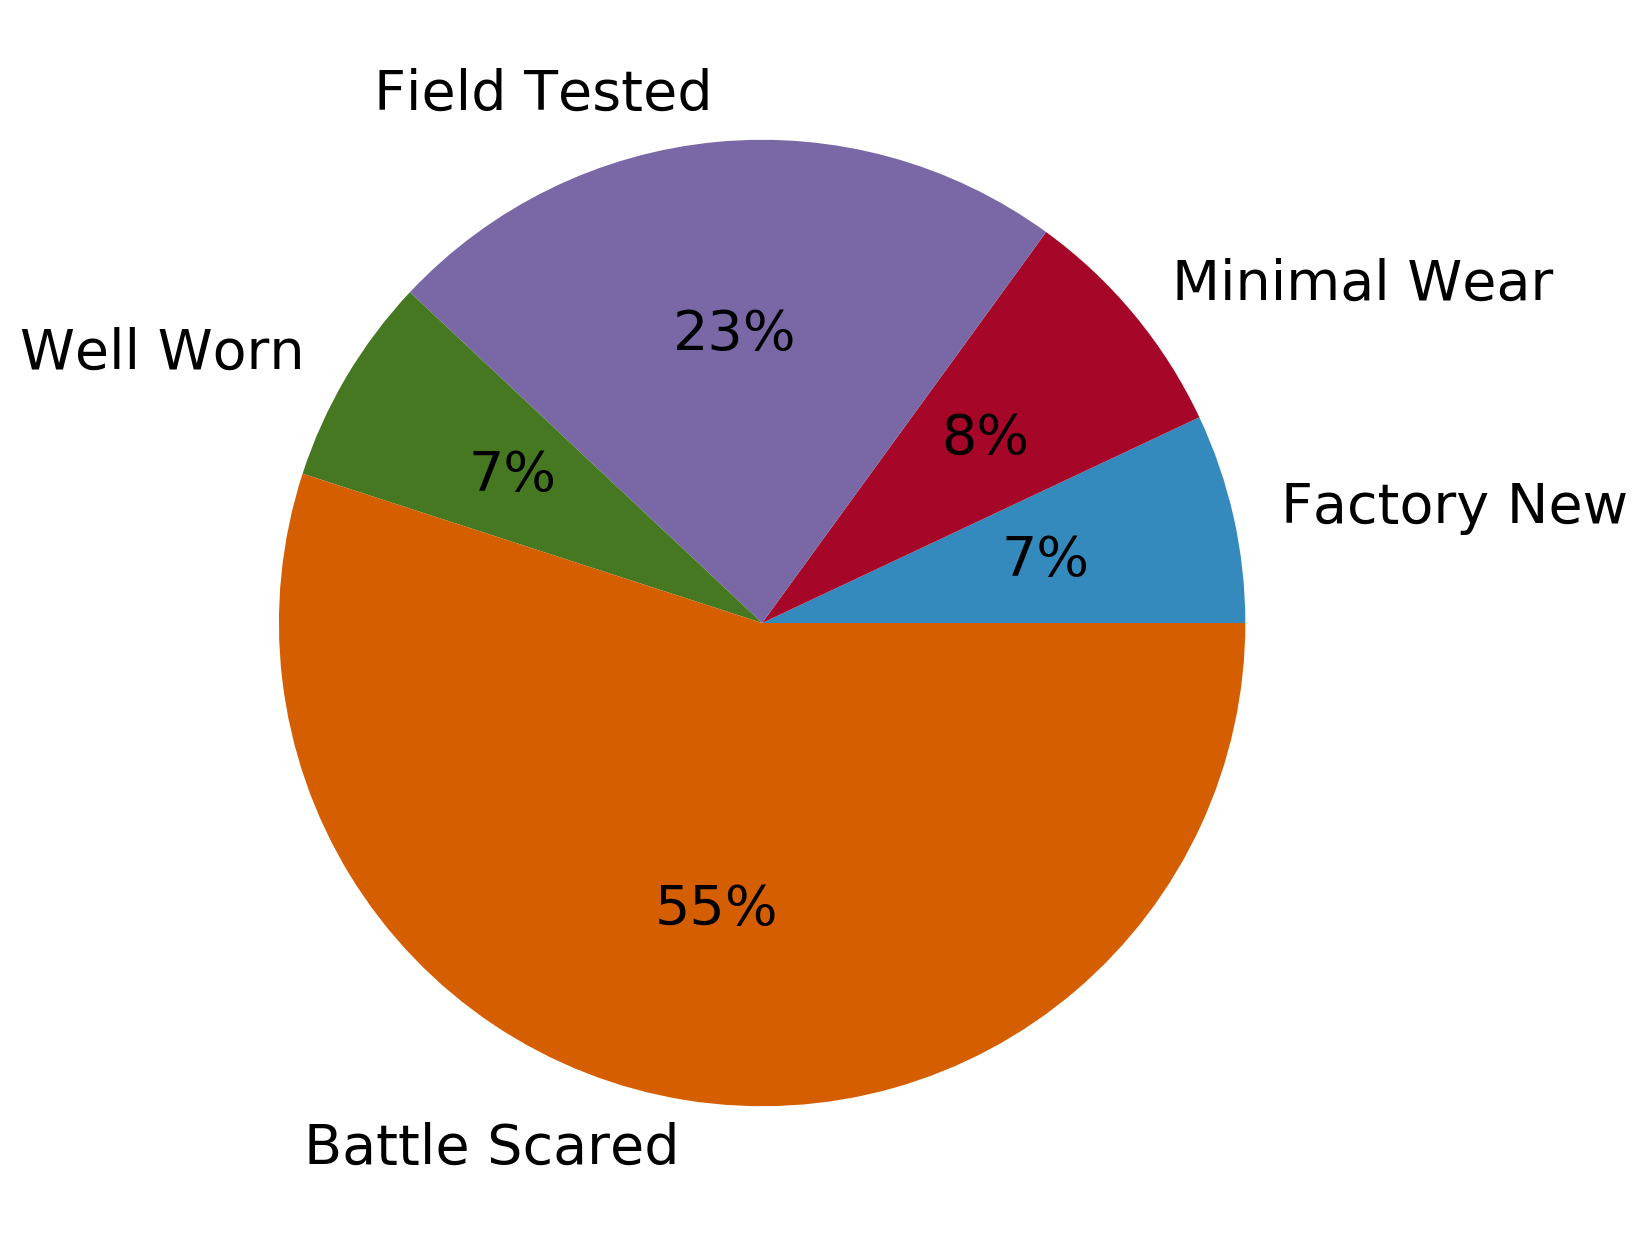

In [7]:
plt.pie(skin_condition_pdf, labels=list(skin_condition_probs.keys()),autopct='%1.f%%')
plt.show()

In [8]:
# from https://www.skinwallet.com/csgo/best-csgo-cases/#Opening_cases_or_buying_skins
case_drop_probs = {'Blue': 1, #0.7992327
                   'Purple': 0.2007672, #0.1598465
                   'Pink': 0.0409207, #0.0319693
                   'Red': 0.0089514, #0.0063939
                   'Yellow': 0.0025575}
case_drop_cdf = [1, 0.2007672, 0.0409207, 0.0089514, 0.0025575]
case_drop_pdf = [0.7992327, 0.1598465, 0.0319693, 0.0063939, 0.0025575]

stattrack_prob = 0.10 # with this probability we'll double the value

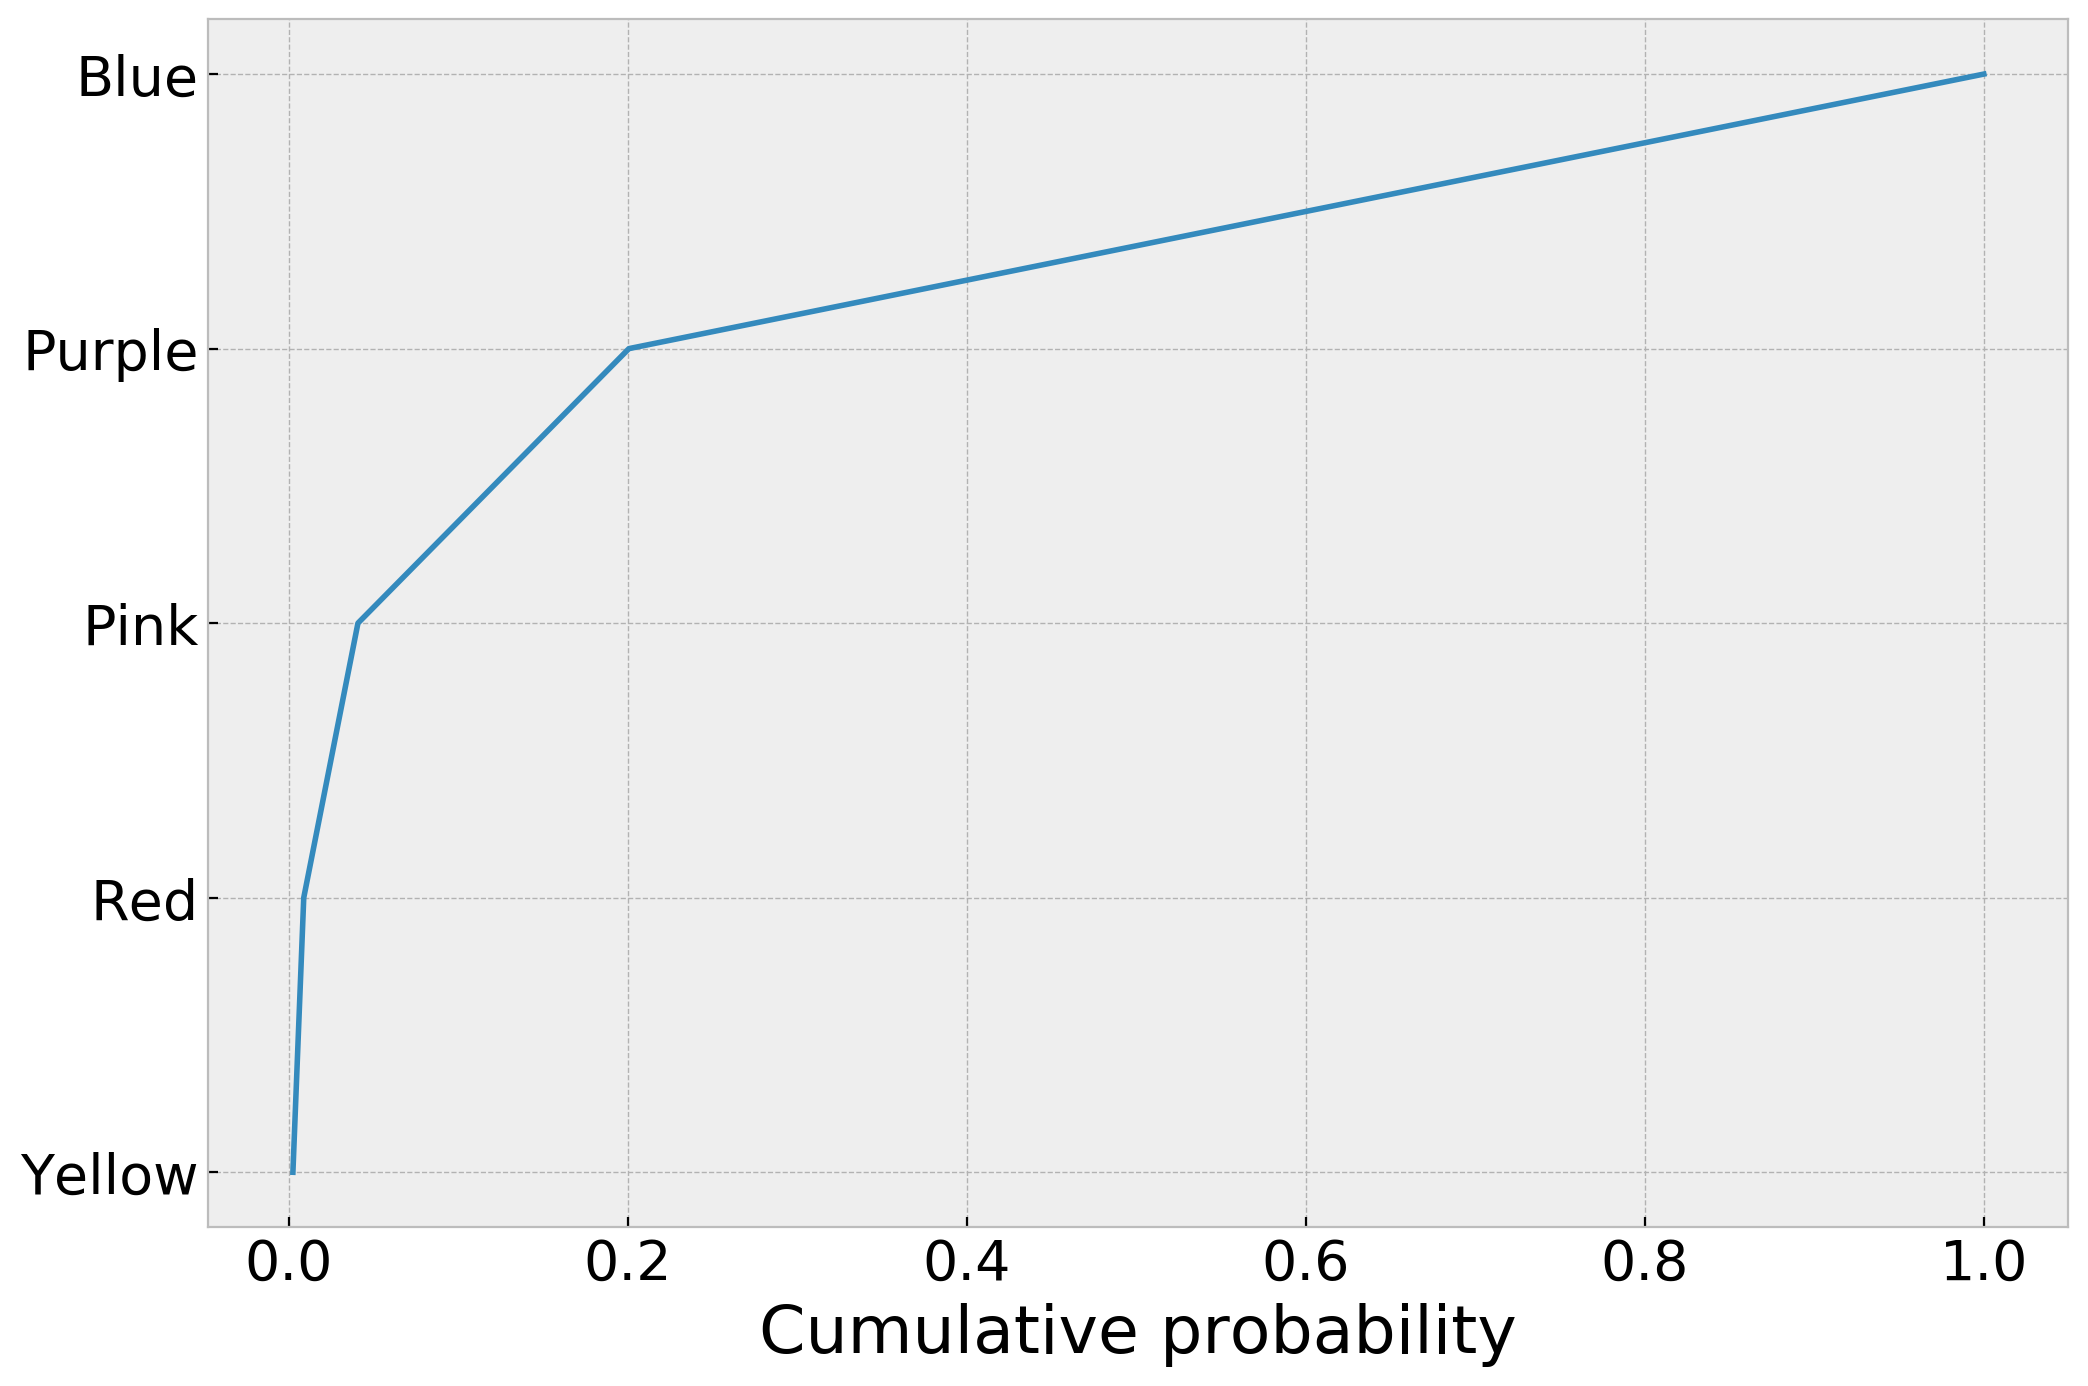

In [9]:
x = list(case_drop_probs.values())
lbls = list(case_drop_probs.keys())
x.reverse()
lbls.reverse()
plt.plot(x, lbls)
plt.xlabel('Cumulative probability')
plt.show()

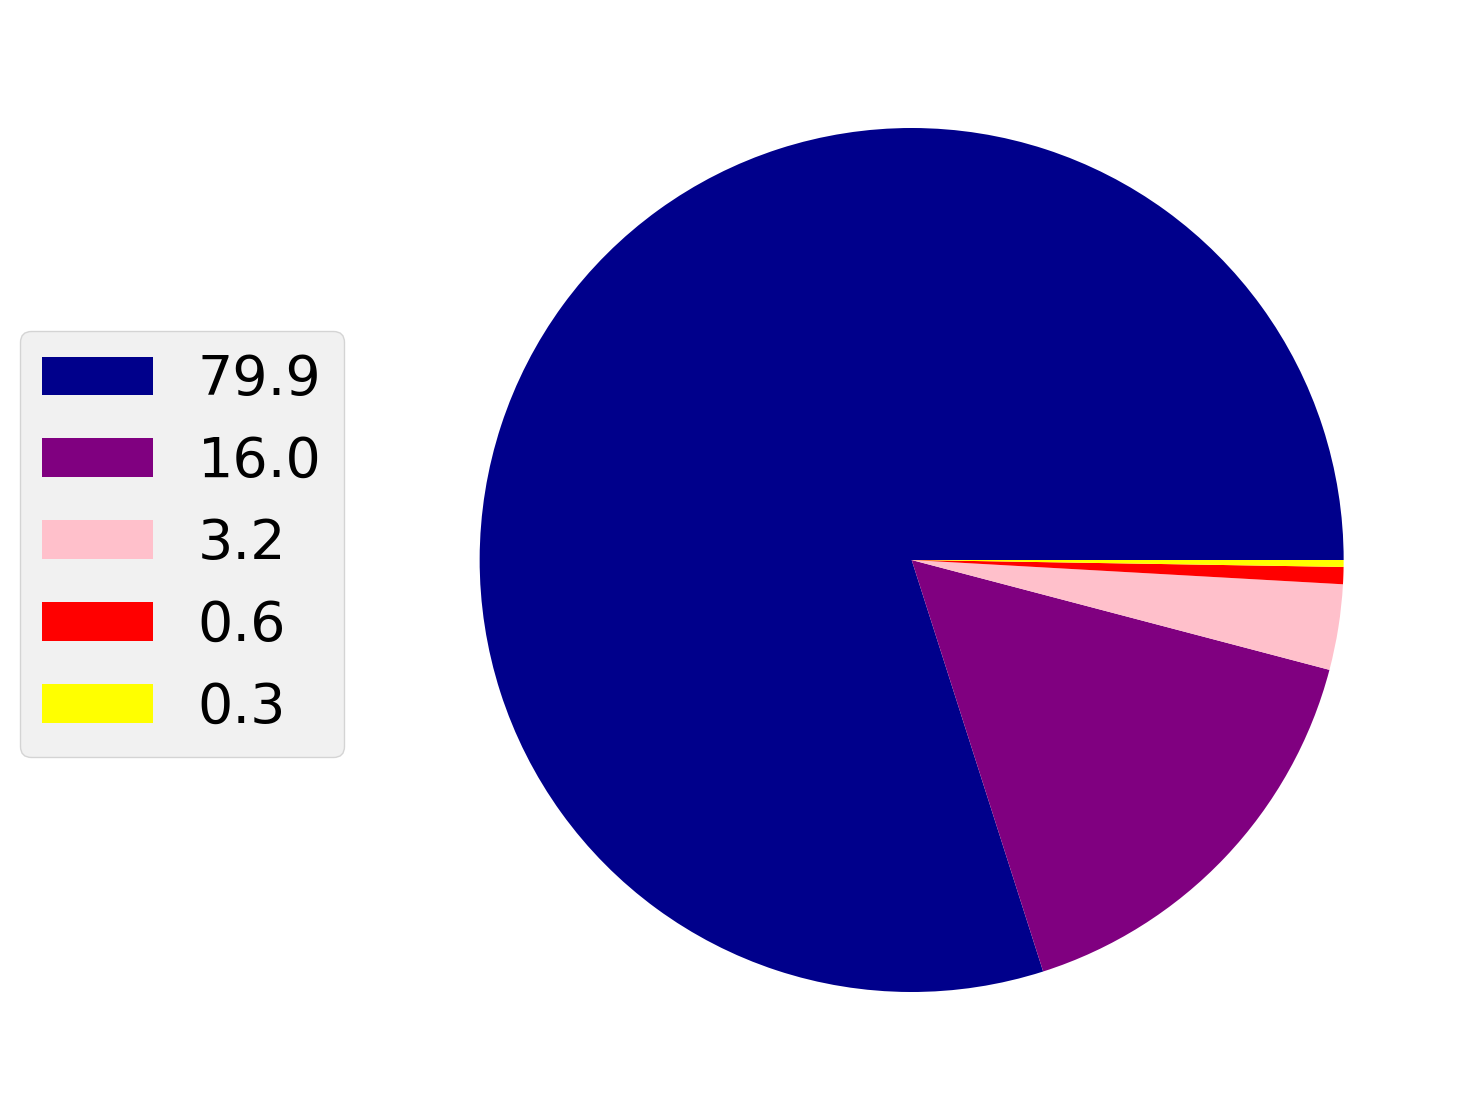

In [10]:
patches, texts = plt.pie(case_drop_pdf,colors=['darkblue','purple','pink','red','yellow'])
plt.legend([round(i*100, 1) for i in case_drop_pdf], bbox_to_anchor=(0,0.5), loc="center right",
           fontsize=20, bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.45)
plt.show()

In [11]:
# not all items in all conditions are actually available on the marketplace
item = 'P90 | Death by Kitty'
for condition in skin_condition_probs:
    item_condition = item+' ('+condition+')'
    print(item_condition)
    try:
        print(data[item_condition]['steam']['last_90d'])
    except:
        pass

P90 | Death by Kitty (Factory New)
P90 | Death by Kitty (Minimal Wear)
50.55
P90 | Death by Kitty (Field Tested)
P90 | Death by Kitty (Well Worn)
P90 | Death by Kitty (Battle Scared)


In [12]:
def nan_helper(y):
    """Helper to handle indices and logical indices of NaNs.
    (from stackoverflow user snake_charmer
    https://stackoverflow.com/questions/6518811/interpolate-nan-values-in-a-numpy-array)

    Input:
        - y, 1d numpy array with possible NaNs
    Output:
        - nans, logical indices of NaNs
        - index, a function, with signature indices= index(logical_indices),
          to convert logical indices of NaNs to 'equivalent' indices
    Example:
        >>> # linear interpolation of NaNs
        >>> nans, x= nan_helper(y)
        >>> y[nans]= np.interp(x(nans), x(~nans), y[~nans])
    """

    return np.isnan(y), lambda z: z.nonzero()[0]

In [13]:
def get_prices(item):
    if item == 'Knife':
        return np.array([300])
    else:
        prices = np.empty(5)
        prices[:] = np.nan
        idx = 0
        for condition in skin_condition_probs:
            item_condition = item+' ('+condition+')'
            try:
                prices[idx] = data[item_condition]['steam']['last_90d']
            except:
                pass
            idx += 1
        if np.count_nonzero(~np.isnan(prices)) == 0: # don't extrapolate if we know nothing
            print("No items of this condition found for {} on the marketplace!".format(item))
        else: # fill extrapolate values
            nans, x = nan_helper(prices)
            prices[nans] = np.interp(x(nans), x(~nans), prices[~nans])
    return prices

In [14]:
case_items_worth = {}
for colour in case_items:
    case_items_worth[colour] = []
    for item in case_items[colour]:
        print(item)
        case_items_worth[colour].append(get_prices(item))

M249 | Magma
Five-SeveN | Kami
PP-Bizon | Cobalt Halftone
Galil AR | Sandstorm
Nova | Rising Skull
FAMAS | Pulse
Dual Berettas | Marina
MP9 | Rose Iron
P250 | Mehndi
P250 | Mehndi
AWP | Redline
Sawed-Off | The Kraken
M4A4 | Asiimov
No items of this condition found for M4A4 | Asiimov on the marketplace!
Knife


In [15]:
case_items_worth

{'Blue': [array([0.63, 0.42, 0.42, 0.42, 0.42]),
  array([0.72, 0.46, 0.46, 0.46, 0.46]),
  array([0.98, 0.41, 0.41, 0.41, 0.41]),
  array([1.77, 1.77, 1.77, 1.77, 1.77])],
 'Purple': [array([2.72, 2.3 , 2.3 , 2.3 , 2.3 ]),
  array([4.57, 3.33, 3.33, 3.33, 3.33]),
  array([7.06, 2.43, 2.43, 2.43, 2.43]),
  array([7.19, 5.58, 5.58, 5.58, 5.58])],
 'Pink': [array([12.3 ,  8.12,  8.12,  8.12,  8.12]),
  array([12.3 ,  8.12,  8.12,  8.12,  8.12]),
  array([31.27, 31.27, 31.27, 31.27, 31.27])],
 'Red': [array([7.38, 5.32, 5.32, 5.32, 5.32]),
  array([nan, nan, nan, nan, nan])],
 'Yellow': [array([300])]}

In [16]:
# due to some missing data, I manually added data for the M4A4 | Asiimov
case_items_worth_manual = {'Blue': [np.array([0.63, 0.42, 0.42, 0.42, 0.42]),
  np.array([0.72, 0.46, 0.46, 0.46, 0.46]),
  np.array([0.98, 0.41, 0.41, 0.41, 0.41]),
  np.array([1.77, 1.77, 1.77, 1.77, 1.77])],
 'Purple': [np.array([2.72, 2.3 , 2.3 , 2.3 , 2.3 ]),
  np.array([4.57, 3.33, 3.33, 3.33, 3.33]),
  np.array([7.06, 2.43, 2.43, 2.43, 2.43]),
  np.array([7.19, 5.58, 5.58, 5.58, 5.58])],
 'Pink': [np.array([12.3 ,  8.12,  8.12,  8.12,  8.12]),
  np.array([12.3 ,  8.12,  8.12,  8.12,  8.12]),
  np.array([31.27, 31.27, 31.27, 31.27, 31.27])],
 'Red': [np.array([7.38, 5.32, 5.32, 5.32, 5.32]),
  np.array([41.40, 73.42, 102.66, 102.66, 102.66])],
 'Yellow': [np.array([300])]}

In [17]:
expected_item_value = {}
for colour in case_items_worth_manual:
    expected_item_value[colour] = []
    for item in case_items_worth_manual[colour]:
        expected_item_value[colour].append(np.sum(item * skin_condition_pdf))
expected_item_value

{'Blue': [0.43470000000000003,
  0.47820000000000007,
  0.44989999999999997,
  1.7700000000000002],
 'Purple': [2.3293999999999997, 3.4168000000000003, 2.7541, 5.6927],
 'Pink': [8.412600000000001, 8.412600000000001, 31.270000000000003],
 'Red': [5.4642, 96.0326],
 'Yellow': [300.0]}

In [18]:
expected_case_values = []
for colour in expected_item_value:
    expected_case_values.append(np.mean(expected_item_value[colour]))
expected_case_value = np.sum(np.asarray(expected_case_values) * case_drop_pdf)*(1+stattrack_prob)

In [19]:
expected_case_values

[0.7832000000000001, 3.54825, 16.031733333333335, 50.748400000000004, 300.0]

In [20]:
expected_case_value

3.077126669626167

In [21]:
case_price = 5.20
profit_loss = expected_case_value - case_price
expected_number_of_boxes_untill_knife = 0.5/0.0025575

In [22]:
expected_number_of_boxes_untill_knife

195.50342130987292

In [23]:
profit_loss*expected_number_of_boxes_untill_knife

-415.0289990955685